# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 03: Dimentionality reduction (55 min)

- Time: 10:00 - 10:55:00, June 17, 2025
Welcome to the practical session 03. Created by Víctor Muñiz and Nelly Selem (Secodment host), Jeanett Daga (Secodment).

---

## Background

Microbiome studies often produce high-dimensional data, with each sample containing hundreds or thousands of microbial taxa or gene functions, typically from 16S rRNA or shotgun metagenomics. This complexity can obscure biologically relevant patterns and lead to challenges such as overfitting and noise. Dimensionality reduction techniques help simplify these datasets by projecting them into lower-dimensional spaces while retaining important variation for tasks like clustering, classification, and visualization.

Common methods include PCA and PCoA, which are linear and useful for beta diversity analysis, as well as nonlinear approaches like t-SNE and UMAP, which preserve local data structure and reveal hidden patterns in microbial communities. These tools have been widely applied in large projects such as the Human Microbiome Project (HMP) and Earth Microbiome Project [EMP]( http://www.earthmicrobiome.org, https://doi.org/10.1038/nature24621).

Choosing the right method affects biological interpretation. UMAP, for example, has gained popularity over t-SNE for better preserving both global and local relationships (https://doi.org/10.1038/nbt.4314). When combined with supervised learning or functional profiling, dimensionality reduction becomes a key step in revealing insights from increasingly complex microbiome data.

🏆 QUESTIONS
* Why is dimensionality reduction important in microbiome studies?

* How does reducing dimensions help us interpret complex biological data?

* What are the differences between PCA, PCoA, t-SNE, and UMAP?

🎯 AIMS

1. Apply dimensionality reduction techniques (PCA, PCoA, UMAP and t-SNE) to high-dimensional microbiome data for visualization and pattern recognition.

2. Explore sample clustering based on microbial profiles and metadata.


🔑 KEY POINTS

*  Microbiome data is high-dimensional; reduction aids interpretation.
*  Euclidean distance can measure many types of data sets non neccesarily from
   biological origin

*  PCA and PCoA are linear; t-SNE and UMAP are nonlinear.

*  UMAP and t-SNE capture local structure and hidden clusters.

*  EMP500 is ideal for testing dimensionality reduction.

---
📥 **Input: Multi-omic dataset from EMP500 project
  
  Sample metadata: Sample.tsv

  Metagenomic feature tables:

    ogu.biom (BIOM format for feature abundance)

📤 Output:

  PCA, PCoA, t-SNE, and UMAP plots
  Cluster patterns by metadata (e.g., geography, empo_1 empo_2)

## Preparation (5 min - 10:00 am)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import skbio
skbio.__version__

'0.6.3'

We will be using different functions available in the script file ``aux_functions.py``. In order to use them, we need to load them from local drive. Please follow these instrucions:

1. Go to Drive and select `Shared with me` in your Google account.
2. Go to `Module 2 Clustering` folder and select `Organize-->Add shortcut` from the drop-down menu:
![img1](https://drive.google.com/uc?export=view&id=1lDtIl4f83JWcyS6owwow1TE0HK2KdK4c)

3. Add a shortcut for `Module 2 Clustering` to `My Drive` by selecting `All locations` tab. Choose `Add`:
![img2](https://drive.google.com/uc?export=view&id=1bXu5GUg7xLtAi0RGDJLTb2yvmbDiKotq)

4. You will now see the shortcut to `Module 2 Clustering` on your drive and can access it as a local folder:
![img2](https://drive.google.com/uc?export=view&id=1m9oQegI7N3UFNNY-7wF7wgGW1z9nO79u)

5. Run the following code to mount the folder:



In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
# woriking directory
os.chdir('/content/drive/My Drive/Module 2 Clustering/2. Notebooks_Latam/')

Mounted at /content/drive/


In [ ]:
!ls

'01: Data integration and processing.ipynb'
'02:  Beta Diversity.ipynb'
'03_ dimentionality reduction_vic.ipynb'
'04: Clustering _vic.ipynb'
'05: Clustering evaluation_vic.ipynb'
'06: Otherdatasets.ipynb'
 aux_functions.py
'Copy of 05: Clustering evaluation_vic.ipynb'
 __pycache__
 reduced_proj.csv


In [ ]:
import skbio
skbio.__version__
import pandas as pd
from skbio import Table
from skbio.diversity import beta_diversity



we are using the following data to make a Beta biodiversity analysis To compute and visualize beta diversity, you need:

1. Sample metadata (latam_samples.tsv): environmental metadata per sample.
2. feature table (latam_ogu.biom)counts of microbial taxa (OGUs) per sample.
3. Phylogenetic tree (latam_ogu.nwk)for UniFrac.
4. Taxonomy Taxonomy assignment file (latam_ogu.tax). for heatmaps

## Data representation (5 min - 10:05 am)

Our data will consists on counts of microbial taxa for each sample, that we can represent as a matrix $X$ with $n$ rows (samples) and $d$ columns (taxon). First, let's create a small sample data set:

In [ ]:
import pandas as pd

In [ ]:
# Create the abundance table
data = {'Taxon1': [10, 2, 4, 9],'Taxon2': [5, 3, 3, 7],'Taxon3': [0, 8, 7, 3]}
samples = ['SampleA', 'SampleB', 'SampleC', 'SampleD']

df = pd.DataFrame(data, index=samples)
df

,Taxon1,Taxon2,Taxon3
SampleA,10,5,0
SampleB,2,3,8
SampleC,4,3,7
SampleD,9,7,3


In machine learning (ML) models, and particularly, non-supervised ML, our aim is to find patterns in data, for instance, how they tend to cluster together according to their similarity. For low-dimensional data, we can observe existing patterns, as we can see in the next figure for our toy dataset:

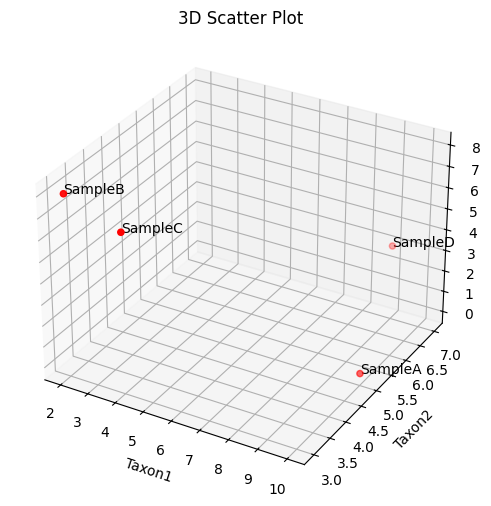

In [ ]:
from aux_functions import plot_3d

plot_3d(df)

However, real datasets are **high dimensional** and **sparse**, with hundreds or thousands columns of counts. Due to the **curse of dimensionality**, and other reasons, it is very convenient to use dimensionality reduction techniques.

What we hope is that all the patterns we were able to observe in the original high-dimensional space can be recovered in the reduced space.

![img1](https://drive.google.com/uc?export=view&id=1YaKiGWovlDRI6zktIn3i7ysTpG5OtR7X)

We will explore such methods in two representations of our data: distance-based and count-based representations.


## Distances and distance matrix (10 min - 10:10 am)

A **distance** is a measure of how far apart (or *different*) two points are. There are different distance functions, as we can see in Figure 1, but in this module, we will explore the popular ones.

![Distance measure](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BKcnB65yMzjbRAy7FQwn3w.png)
Figure 1. Distance measures.

A **distance matrix** is a simetric, positive-definite matrix were distances between pairs of points are represented according to some distance function.

### Bray Curtis distance

In the previous chapter we used the **Bray Curtis** distance without a definition. Since Euclidean distance is the most general distance, here we will learn about Bray Curtis and Euclidean distance mainly.


The Bray-Curtis distance is defined as:
$$\text{Bray-Curtis(A,B)}= \displaystyle\frac{\sum_i{∣𝑎_𝑖−𝑏_𝑖∣}}{\sum_i{(𝑎_𝑖+𝑏_𝑖)}}$$.

For our dataset, let's compute the distance manually for the first two samples:

$\sum{∣𝑎_𝑖−𝑏_𝑖∣}=|10 - 2| + |5 - 3| + |0 - 8| = 8 + 2 + 8 = 18$

$\sum{∣𝑎_𝑖+𝑏_𝑖∣}=(10 + 2) + (5 + 3) + (0 + 8) = 28$

Then, Bray-Curtis between sample A and B is $\frac{18 }{28}$ ≈ 0.6429. Now let's do it using `skbio`.

In [ ]:
from scipy.spatial.distance import braycurtis

sampleA = df.loc['SampleA']
sampleB = df.loc['SampleB']

bc_distance = braycurtis(sampleA, sampleB)
print(f"Bray-Curtis Distance: {bc_distance:.4f}")

Bray-Curtis Distance: 0.6429


### Euclidean Distance
The Euclidean distance is defined as:

$$ \text{Euclidean}(A, B) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + (a_3 - b_3)^2}$$


#### Exercise 1. Calculate manually the euclidean distance between sampple A and sample B
<details>
  <summary> Click here to see the solution</summary>


 $\text{Euclidean}(A, B) = \sqrt{(10 - 2)^2 + (5 - 3)^2 + (0 - 8)^2} = \sqrt{64 + 4 + 64} = \sqrt{132}\approx 11.4891 $

  </details>

### Distance matrices

In `python` we have different options to compute the distance matrix for all samples in our dataset. For Bray-Curtis distance, we can use `beta_diversity`from `scikit-bio`:

In [ ]:
from skbio import DistanceMatrix
from skbio.diversity import beta_diversity

# Compute Bray-Curtis distance matrix
dm_bc = beta_diversity(metric='braycurtis', counts=df, ids=df.index)

print(dm_bc)

4x4 distance matrix
IDs:
'SampleA', 'SampleB', 'SampleC', 'SampleD'
Data:
[[0.         0.64285714 0.51724138 0.17647059]
 [0.64285714 0.         0.11111111 0.5       ]
 [0.51724138 0.11111111 0.         0.39393939]
 [0.17647059 0.5        0.39393939 0.        ]]


For euclidean distances, we can use `sklearn.metrics`module, which is implemented in the  `get_distance_matrix`function (from `aux_functions.py`):

In [ ]:
from aux_functions import get_distance_matrix

dm_euc = get_distance_matrix(df, 'euclidean')
dm_euc

,SampleA,SampleB,SampleC,SampleD
SampleA,0.000000,11.489125,9.433981,3.741657
SampleB,11.489125,0.000000,2.236068,9.486833
SampleC,9.433981,2.236068,0.000000,7.549834
SampleD,3.741657,9.486833,7.549834,0.000000


When the number of samples $n$ is not so large, a heatmap is a good visualization of distance matrices. For illustration purposes, we will compare Bray-Curtis, Euclidean and Cosine distances:

In [ ]:
dm_cos = get_distance_matrix(df, 'cosine')
dm_cos

,SampleA,SampleB,SampleC,SampleD
SampleA,1.110223e-16,6.432470e-01,0.428137,0.051696
SampleB,6.432470e-01,1.110223e-16,0.032922,0.391041
SampleC,4.281372e-01,3.292170e-02,0.000000,0.230920
SampleD,5.169595e-02,3.910414e-01,0.230920,0.000000


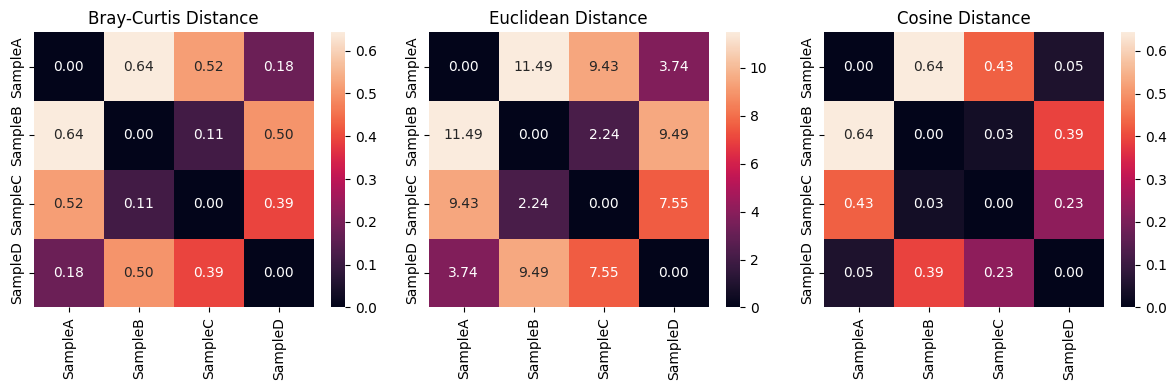

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4)) # Adjust figure size to accommodate two heatmaps

plt.subplot(1, 3, 1) # Create a subplot for the first heatmap
sns.heatmap(dm_bc.data, annot=True, fmt=".2f", xticklabels=dm_bc.ids, yticklabels=dm_bc.ids)
plt.title("Bray-Curtis Distance", fontsize=12)

plt.subplot(1, 3, 2) # Create a subplot for the second heatmap
sns.heatmap(dm_euc, annot=True, fmt=".2f", xticklabels=dm_euc.index, yticklabels=dm_euc.index)
plt.title("Euclidean Distance", fontsize=12)

plt.subplot(1, 3, 3) # Create a subplot for the second heatmap
sns.heatmap(dm_cos, annot=True, fmt=".2f", xticklabels=dm_cos.index, yticklabels=dm_cos.index)
plt.title("Cosine Distance", fontsize=12)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Load EMPO data (5 min - 10:20 am)

Now we will load EMPO data and metadata to apply dimensionality reduction techniques.

In [ ]:
from aux_functions import get_data

# Create a text variable to use after as a path to read files
#github_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"
data_path = "../1.Data/"
# data options:
#1 Latam Shotgun (default), loads the Latin America (filtered) dataset.
#2 EMP 500 Shotgun, loads the global dataset
#3 Latam Amplicon, loads the Latin America (filtered) 16S dataset.
biom_df, metadata_df = get_data(data_path, data=1)
# labels for each sample
labels_data = metadata_df['empo_2']
biom_df


,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,23.0,0,1.0,0,0
13114.jensen.43.s013,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,2.0,0
13114.pinto.63.s001,0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimensionality reduction can be applied to different representations of data, best method depends on the characteristics of such representation. We will explore some reduction techniques for count-based and distance-based representations.

## Frecuency-based representation (15 min - 10:25 am)

We have two weighting schemes for gene occurrence: frecuency (`biom_df`) and inverse-frecuency (`biom_tfidf`).

In [ ]:
from aux_functions import get_tfidf

tfidf_vect, tfidf = get_tfidf(biom_df)
biom_tfidf = pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out(),index=biom_df.index)
biom_tfidf

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000069,...,0.0,0.0,0.0,0.0,0.0,0.001403,0.0,0.000079,0.00000,0.0
13114.jensen.43.s013,0.0,0.0,0.0,0.002558,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.002502,0.0,0.000000,0.00000,0.0
13114.jensen.43.s014,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000459,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00155,0.0
13114.pinto.63.s001,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00074,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
13114.pinto.63.s002,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
13114.zaneveld.9.s010,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
13114.zaneveld.9.s011,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
13114.zaneveld.9.s012,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0


### Factorization methods

Our data matrix (frequency of inverse-frequency) is high-dimensional, sparse and non-negative. There are two methods for dimensionality reduction based on matrix factorizations that are appropriate for the characteristics of the data.

#### Truncated SVD factorization

SVD is a matrix factorization technique that factors a matrix $A$ into the three matrices U, Σ, and V. **Truncated SVD** produces a factorization where the **number of columns is equal to the specified truncation**.

![](https://drive.google.com/uc?export=view&id=1UsZNvN1hxr1TLjbcfLk5kfxRqWDiNUtM)


In [ ]:
from aux_functions import get_lsa, get_nmf

dir_fact = '../models/'
n_comp = 50
exfact = False
nf = 'svd_tfidf'
fact_svd = get_lsa(biom_tfidf, exist_fact = exfact, fact_path = dir_fact, n_file = nf, n_comp = n_comp, save=True)

In [ ]:
import plotly.express as px

embedding = fact_svd
reduced_proj = pd.DataFrame({'x1': embedding.iloc[:,0], 'x2': embedding.iloc[:,1], 'label': labels_data})
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='Reduced SVD plot')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

#### Non-negative matrix factorization (NMF).

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices **have no negative elements**.

![](https://drive.google.com/uc?export=view&id=1CjkAK6MFYTWXigpg6Nk1KPrDE3hS4yHe)


In [ ]:
dir_fact = '../models/'
n_comp = 50
exfact = False
nf = 'nmf_tfidf'
fact_nmf = get_nmf(biom_tfidf, exist_fact = exfact, fact_path = dir_fact, n_file = nf, n_comp = n_comp, save=True)

In [ ]:
embedding = fact_nmf
reduced_proj = pd.DataFrame({'x1': embedding.iloc[:,0], 'x2': embedding.iloc[:,1], 'label': labels_data})
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='Reduced NMF plot')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

### Manifold learning methods

[Manifold learning](https://scikit-learn.org/stable/modules/manifold.html) is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.

There are two main approaches for manifold learning:
- t-stochastic neighbor embedding ([t-SNE](https://lvdmaaten.github.io/tsne/)). Good at preserving **local structures** in data.
![](https://drive.google.com/uc?export=view&id=1ItFWBf0E66ZiurWf3yp3JPzSUcTAfzkg)

- Uniform Manifold Approximation and Prediction ([UMAP](https://umap-learn.readthedocs.io/en/latest/index.html)).
![](https://drive.google.com/uc?export=view&id=1IAsUo3FCcZ3kb_3IZYJz3DVRZZ_RjqqJ)

  - better preserves both local and global structure
  - supports *predict* methods, allowing new data to be projected into an existing embedding


Here, we will be using UMAP.

In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=5, n_components=3, min_dist=.12, metric='braycurtis', random_state=42)
embedding = reducer.fit_transform(biom_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data})
#reduced_proj['clust'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='UMAP')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

#### Exercise 2. Change the parameters of UMAP to obtain different data configurations. Check if you can observe interesting patterns


## Distance-based representations (10 min - 10:40 am)

First, we will create a distance matrix for biom data:

In [ ]:
# Calculate Bray-Curtis distances
biom_dm = beta_diversity("braycurtis", biom_df)
biom_dm = beta_diversity("braycurtis", biom_tfidf)

# Convert the distance matrix to a pandas DataFrame
biom_dm = biom_dm.to_data_frame()
#biom_dm.index = biom_df.index
#biom_df

For dimension reduction, we will use two popular approaches for distance matrix: Principal Component Analysis (PCA) and non-metric Multidimensional Scaling (MDS)

#### Principal component analysis (PCA) and principal coordinate analysis (PCoA).

PCA and PCoA are very similar. They performs dimensionality reduction by projecting the original data into ortogonal coordinates (principal components), defining a new coordinate system.

The solutions of both, PCA and PCoA are based on eigendecomposition of

$$
  B = U \Lambda U',
$$
for some matrix square matrix $B$.
- In PCA $B=X'X$, i.e., the sample covariance of data based on the orignal attributes $X$. Note that, if data are standardized, covariance is equivalent to euclidean distance.
- In PCoA, $B$ is **a distance** matrix, allowing for different distance functions, including Bray-Curtis and other non-euclidean distances.

In [ ]:
from skbio.stats.ordination import pcoa
embedding = pcoa(biom_dm, number_of_dimensions=3).samples

reduced_proj = pd.DataFrame({'x1': embedding['PC1'], 'x2': embedding['PC2']})
reduced_proj.index = biom_dm.index
reduced_proj['label'] = labels_data
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='PCoA')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

/usr/local/lib/python3.11/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:214: RuntimeWarning:

The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.05449314622839925 whereas the largest positive one is 4.437107966807699.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(biom_dm)

pca = PCA(n_components=3)
#embedding = pca.fit_transform(scaled_data)
embedding = pca.fit_transform(biom_dm)

reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data})
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='PCA')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

#### Non-metric MDS

MDS takes a distance matrix (pairwise dissimilarities) as input and maps the objects to coordinates such that the distances in the new space approximate the original dissimilarities as closely as possible.

We can use
- **classical MDS** if the input is Euclidean distances, it uses eigenvalue decomposition to find the optimal configuration analytically. In this case, MDS=PCA.

- **Non-Metric MDS**: Used when only the rank order of dissimilarities matters, not their exact values.

In [ ]:
from sklearn.manifold import MDS

#biom_dm = np.round(biom_dm,5)
nmds = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=42)
embedding = nmds.fit_transform(biom_dm)

In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data})
fig = px.scatter(reduced_proj, x='x1', y='x2', color = 'label', title='non-metric MDS')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

## Self evaluation poll (10 min - 10:50 am)

This short assessment will help reinforce your understanding and prepare you for further analysis and integration tasks in microbiome research.

📌 Click the link below to begin the quiz: 👉  [Poll link, Quiz 3](https://pollev.com/biotrainaicabana135)

1. Select “**Skip for now**” when prompted to log in.

2. Enter **your name** to join as a participant.

3. **Select all correct answers** — some questions may have multiple correct options.

4. You can review your **results** at the end of the quiz.
